<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf 

data = np.load('../quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [2]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

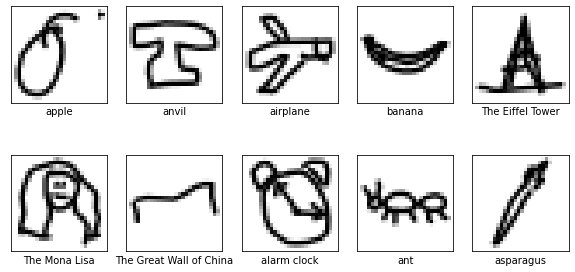

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [4]:
# Need this line to randomly shuffle both the X & y at the same time.
from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [5]:
data = np.load('../quickdraw10.npz')
data.files
    
def load_quickdraw10(path, x_loc, y_loc, outlier_val=-1):
    """
    Get loaded data and split; returns X_train/test and y train_test
    with 40% split.
    Normalize data; enter in outlier value or keep default (-1) to 
    select auto and find X max.
    
    Input: data path, X and y index label
    
    :Return: X_train, X_test, y_train, y_test
    """
    X = path[x_loc]
    y = path[y_loc]
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.4,
                                                        random_state=445642)
    # Read or find outlier, -1 is auto, else inputed value used.
    if outlier_val == -1:
        outlier_val = X.max()
    else:
        outlier_val = outlier_val
    
    # Normalize X_test/train by outlier value
    X_train, X_test = X_train.astype('float32') / outlier_val, X_test.astype('float32') / outlier_val
    
    # Print info
    print(f'X shape = {X.shape}\n'
          f'y shape = {y.shape}\n'
          f'X (max, min) = ({X.max()}, {X.min()})\n'
          f'X (train.shape, test.shape) = [ {X_train.shape}, {X_test.shape} ]\n\n'
          f'y Unique = {len(np.unique(y))}')
    
    return X_train, y_train, X_test, y_test

In [6]:
X_train, y_train, X_test, y_test = load_quickdraw10(path=data,
                                                   x_loc='arr_0',
                                                   y_loc='arr_1')

X shape = (100000, 784)
y shape = (100000,)
X (max, min) = (255, 0)
X (train.shape, test.shape) = [ (60000, 784), (40000, 784) ]

y Unique = 10


## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [7]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD, Nadam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
opt = SGD()
# Hidden layer
model.add(
          Dense(32, activation='relu', input_dim=784))
model.add(
          Dense(10, activation='softmax'))

compiled_model = model.compile(optimizer=opt,
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])
    
results = model.fit(X_train, y_train, batch_size=64, validation_split=0.2, epochs=5)


Epoch 1/5
750/750 [==============================] - 1s 1ms/step - loss: 1.8885 - accuracy: 0.3462 - val_loss: 1.1019 - val_accuracy: 0.6725
Epoch 2/5
750/750 [==============================] - 1s 692us/step - loss: 1.0501 - accuracy: 0.6901 - val_loss: 0.9491 - val_accuracy: 0.7213
Epoch 3/5
750/750 [==============================] - 1s 682us/step - loss: 0.9259 - accuracy: 0.7281 - val_loss: 0.8946 - val_accuracy: 0.7402
Epoch 4/5
750/750 [==============================] - 1s 682us/step - loss: 0.8779 - accuracy: 0.7411 - val_loss: 0.8590 - val_accuracy: 0.7542
Epoch 5/5
750/750 [==============================] - 1s 674us/step - loss: 0.8489 - accuracy: 0.7547 - val_loss: 0.8297 - val_accuracy: 0.7628


### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [8]:
results.history

{'loss': [1.5301622152328491,
  1.009989619255066,
  0.916134774684906,
  0.8693663477897644,
  0.8363455533981323],
 'accuracy': [0.5093749761581421,
  0.7016249895095825,
  0.7301250100135803,
  0.7452916502952576,
  0.7578125],
 'val_loss': [1.1019219160079956,
  0.949134349822998,
  0.8945546746253967,
  0.8589606881141663,
  0.8296760320663452],
 'val_accuracy': [0.6725000143051147,
  0.7213333249092102,
  0.7402499914169312,
  0.7542499899864197,
  0.7627500295639038]}

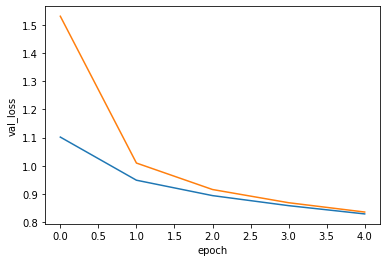

In [9]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(results.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [10]:
model = Sequential()
opt = Adam()
# Hidden layer
model.add(
          Dense(32, activation='relu', input_dim=784))
model.add(
          Dense(10, activation='softmax'))

compiled_model = model.compile(optimizer=opt,
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])
    
results_adam = model.fit(X_train, y_train, batch_size=64, validation_split=0.2, epochs=5)

Epoch 1/5
750/750 [==============================] - 1s 886us/step - loss: 1.2005 - accuracy: 0.6281 - val_loss: 0.7685 - val_accuracy: 0.7754
Epoch 2/5
750/750 [==============================] - 1s 776us/step - loss: 0.7241 - accuracy: 0.7897 - val_loss: 0.6853 - val_accuracy: 0.7996
Epoch 3/5
750/750 [==============================] - 1s 1ms/step - loss: 0.6560 - accuracy: 0.8104 - val_loss: 0.6567 - val_accuracy: 0.8103
Epoch 4/5
750/750 [==============================] - 1s 888us/step - loss: 0.6126 - accuracy: 0.8236 - val_loss: 0.6302 - val_accuracy: 0.8132
Epoch 5/5
750/750 [==============================] - 1s 877us/step - loss: 0.5707 - accuracy: 0.8338 - val_loss: 0.6223 - val_accuracy: 0.8169


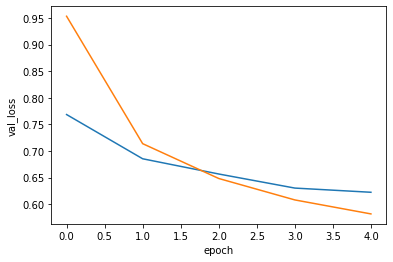

In [11]:
df = pd.DataFrame.from_records(results_adam.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

In [12]:
model = Sequential()
opt = Nadam()
# Hidden layer
model.add(
          Dense(32, activation='relu', input_dim=784))
model.add(
          Dense(10, activation='softmax'))

compiled_model = model.compile(optimizer=opt,
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])
    
results_nadam = model.fit(X_train, y_train, batch_size=64, validation_split=0.2, epochs=5)

Epoch 1/5
750/750 [==============================] - 1s 1ms/step - loss: 1.1844 - accuracy: 0.6298 - val_loss: 0.7544 - val_accuracy: 0.7878
Epoch 2/5
750/750 [==============================] - 1s 764us/step - loss: 0.7172 - accuracy: 0.7938 - val_loss: 0.6828 - val_accuracy: 0.8018
Epoch 3/5
750/750 [==============================] - 1s 779us/step - loss: 0.6450 - accuracy: 0.8128 - val_loss: 0.6463 - val_accuracy: 0.8125
Epoch 4/5
750/750 [==============================] - 1s 769us/step - loss: 0.5913 - accuracy: 0.8270 - val_loss: 0.6312 - val_accuracy: 0.8156
Epoch 5/5
750/750 [==============================] - 1s 808us/step - loss: 0.5718 - accuracy: 0.8352 - val_loss: 0.6152 - val_accuracy: 0.8184


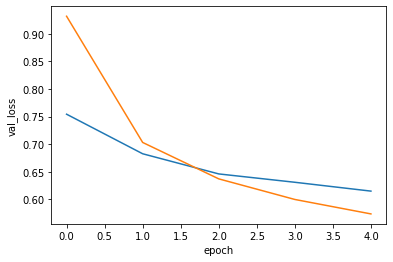

In [13]:
df = pd.DataFrame.from_records(results_nadam.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why?
    - In binary classifications, picking a loss function that has non-zero derivitives [[1]](https://stats.stackexchange.com/questions/222585/what-are-the-impacts-of-choosing-different-loss-functions-in-classification-to-a) From the list in the loss function list above, I would use BinaryCrossentroy.


2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
    - When compiling a model, the loss function is passed in to optimize the model while training. Like loss function, metric is also passed in at compilation and is a list of parameters used for judging model performance.


3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer?
    - SGD is a better generalizer than Adam, RMSprop and AdaGrad. Adam/Nadam have the lowest training error/loss but not value error/loss[[2]](https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/). SGD has been improved from base SGD providing better results.

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)